# AMath 574 Homework 4

## Partial solution for p-system Riemann problems

In [ ]:
%matplotlib inline

In [ ]:
from __future__ import print_function

In [ ]:
from pylab import *

In [ ]:
from scipy.optimize import fsolve  # for solving nonlinear equation

In [ ]:
matplotlib.rc('text', usetex = True)  # to allow subscripts in annotations

In [ ]:
p = lambda v: -exp(v)    

In [ ]:
def hugoniot_loci(vstar,ustar):
    """
    ustar and vstar are a single state or a list of states.
    """
    if type(ustar) in [float,int]:
        # turn scalars into lists with one element:
        ustar = [ustar]
        vstar = [vstar]
        
    for vs,us in zip(vstar,ustar):
        # loop over each set of states
        v = linspace(-3,5,1000)
        s = sqrt(-(p(v)-p(vs))/(v-vs))
        uplus = us + s*(v-vs)
        uminus = us - s*(v-vs)
        plot(v,uplus,'r')
        plot(v,uminus,'b')
        plot(vs,us,'ko')
    legend(['1-waves','2-waves'], loc='lower left');

### Problem 1(d)

Plot a single set of Hugoniot loci:

In [ ]:
hugoniot_loci(1., 1.)

### Problem 1(e)

In [ ]:
matplotlib.rc('text', usetex = True)  # to allow subscripts in annotations

##  Compute the all-shock Riemann solution

We do this by solving a nonlinear scalar equation $g(v)=0$ for the root $v_m$ that is the desired middle state.

The function $g(v)$ is defined from the condition that the middle state $q_m$ should be connected to $q_\ell$ by a 1-wave and to $q_r$ by a 2-wave, so we want:

$$
u_m  = u_\ell + \sqrt{-\left(\frac{p(v_m)-p(v_\ell)}{v_m-v_\ell}\right)}~(v_m-v_\ell)
\equiv\phi_1(v_m) 
$$

and simultaneously,

$$
u_m  = u_r - \sqrt{-\left(\frac{p(v_m)-p(v_r)}{v_m-v_r}\right)}~(v_m-v_r)
\equiv\phi_2(v_m) 
$$

So we set $g(v) = \phi_1(v) - \phi_2(v)$.  

Note that the function `g` defined here also takes the left and right states as arguments.

In [16]:
def g(vm,vl,ul,vr,ur):
    s = sqrt(-(p(vl)-p(vm))/(vl-vm))
    phi1 = ul + s*(vm-vl)
    s = sqrt(-(p(vr)-p(vm))/(vr-vm))
    phi2 = ur - s*(vm-vr)
    return phi1 - phi2

Solve using the `fsolve` function previously imported from `scipy.optimize`.  See the [documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html).

Based on the plot above, we use `x0 = 3` as an initial guess for `vm`.

In [17]:
fsolution = fsolve(g, x0=3, args=(vl,ul,vr,ur))
vm = fsolution[0]
s = sqrt(-(p(vl)-p(vm))/(vl-vm))
um = ul + s*(vm-vl)
print('Two-shock solution: vm = %g, um = %g' %(vm,um))

Two-shock solution: vm = 3.19779, um = 7.91551


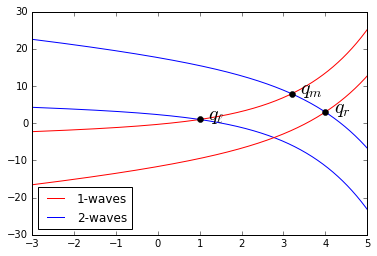

In [18]:
hugoniot_loci([vl,vr], [ul,ur])

text(vl+0.2, ul, '$q_\ell$', fontsize=20)
text(vr+0.2, ur, '$q_r$', fontsize=20)

plot([vm],[um],'ko')
text(vm+0.2, um, '$q_m$', fontsize=20);

### Problem 1(g)

Shade the region where the right state $q_r$ must lie in order for the two-shock Riemann solution to satisfy the entropy condition.

Note that the characteristic speed $\lambda^1 = -e^v$ is a decreasing function of $v$, so $v$ must increase from $q_\ell$ to $q_m$.  And since $\lambda^2 = +e^v$ is an increasing function of $v$, we must also have $v$ decreasing from $q_m$ to $q_r$.  This means $q_r$ must be in the region shown below.

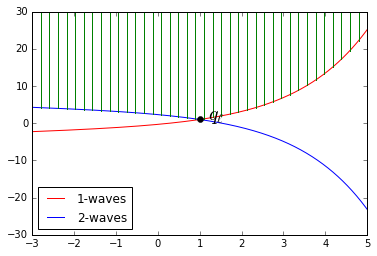

In [19]:
hugoniot_loci(1,1)
text(vl+0.2, ul, '$q_\ell$', fontsize=20)

for v in linspace(-3,5,40):
    s = sqrt(-(p(v)-p(vl))/(v-vl))
    uplus = ul + s*(v-vl)
    uminus = ul - s*(v-vl)
    umin = max(uplus, uminus)
    plot([v,v],[umin,30],'g-')